In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('online_retail_II.xlsx')

In [40]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [4]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


At this point we are going to add a column for "Item Totals" - quantity x price - to aid us later on in finding total transaction value per invoice and then per customer over the time period.

In [5]:
df['Item Total'] = df['Price'] * df['Quantity']

In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


#### Data Definitions

The data are available from UCI's Machine Learning library: https://archive.ics.uci.edu/ml/datasets/Online+Retail+IIt. From there we have the provided data definitions:

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal.

* Quantity: The quantities of each product (item) per transaction. Numeric.

* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

* Country: Country name. Nominal. The name of the country where a customer resides.



#### Data Types

In [7]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Item Total            float64
dtype: object

Based on what we know about the data, we can predict a few steps in our data processing.
* The 'Invoice' column is filled with 'object' type. We know that some invoices indicating cancellations begin with a 'c', and we also know that the number of the invoice is not as important as the invoice as a grouping function for items purchased by a single customer in a single transaction.
* The 'StockCode' column is also object type. Similar to the 'Invoice' column, we don't want the stock codes themselves per se - but the indication of specific objects purchased, the frequency of purchase, and how often specific customers may purhcase them.
* On first glance, the 'Description' column feels extraneous. It may be useful for further analysis once we identify which items by StockCode are the most frequently purchased, but for now we can remove it.
* The 'InvoiceDate' column is already in datetime format, which will be useful in engineering features we believe will be helpful in our analysis (e.g., time elapsed between transactions, mean time between purchases for specific customers). 
* 'Customer ID' as a float is interesting. Our assumption again is that the number recorded here is not as useful as it is as a grouping function. We will likely replace these.

#### Unique Values and Missing Values

In [8]:
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
Item Total      5693
dtype: int64

There are a few salient points to pull out from the number of unique values.

* 28816 unique Invoice values means that we have 28816 specific transactions to work with. With 4383 unique customers, that means we have an average of 6.7ish transactions per customer.
* The same ratio of invoice values to StockCode values means that we have a good range of items on a per transaction basis.

In [9]:
for col in df.columns:
    print('Column ' + col + ' is missing %.0f values, or %.2f percent.' % (df[col].isnull().sum(),(df[col].isnull().sum()/len(df[col]))*100))

Column Invoice is missing 0 values, or 0.00 percent.
Column StockCode is missing 0 values, or 0.00 percent.
Column Description is missing 2928 values, or 0.56 percent.
Column Quantity is missing 0 values, or 0.00 percent.
Column InvoiceDate is missing 0 values, or 0.00 percent.
Column Price is missing 0 values, or 0.00 percent.
Column Customer ID is missing 107927 values, or 20.54 percent.
Column Country is missing 0 values, or 0.00 percent.
Column Item Total is missing 0 values, or 0.00 percent.


At first glance, it is a bit concerning that we are missing 20.54% of our customer ID values. Based on the data available we will not be able to impute this value - meaning we're losing a fifth of our customer data. But with 4383 unique customers we feel confident that we can still perform a robust analysis. 

Our only other missing values are in Description, which does not concern us for the reasons outlined above.

It may not be missing values, but we know that some rows indicate cancellations, as shown by a 'C' at the beginning of the invoice code.

In [10]:
df.loc[df['Invoice'].str[0] == 'C']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany,-4.20
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom,-2.00
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,-2.95
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom,-12.75


So 10206 of our 525460 rows indicate cancellations. Not bad in terms of our overall data, but it may be too small for us to pull out any parallel analyses of patterns in the cancellations.

#### Data Ranges

We only have a few numeric columns for which data ranges interest us - price and quantity. So we'll use the describe method to explore those.

In [11]:
df[['Price','Quantity','Customer ID','Item Total']].describe()

,Price,Quantity,Customer ID,Item Total
count,525461.000000,525461.000000,417534.000000,525461.000000
mean,4.688834,10.337667,15360.645478,18.154506
std,146.126914,107.424110,1680.811316,160.333083
min,-53594.360000,-9600.000000,12346.000000,-53594.360000
25%,1.250000,1.000000,13983.000000,3.750000
50%,2.100000,3.000000,15311.000000,9.950000
75%,4.210000,10.000000,16799.000000,17.700000
max,25111.090000,19152.000000,18287.000000,25111.090000


These data are interesting. We know that some of our invoices represent cancellations (see above), so a possible intuition is that a negative price and/or quantity correlates with a cancellation. We'll explore that in our EDA. We can also see that the majority of our prices and quantities fall into a "reasonable" range (the IQR for both staying between 1-10) with some major outliers. We'll have to account for that in our analysis.

#### Other Quick Analyses

There are a few other counts that would be interesting - for example, the distribution of customers by number of purchases. Those are represented below.

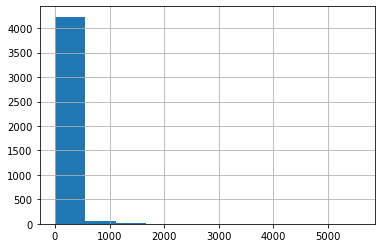

In [12]:
df['Customer ID'].loc[df['Invoice'].str[0] != 'C'].value_counts().hist()

In [13]:
df['Customer ID'].loc[df['Invoice'].str[0] != 'C'].value_counts().head(40)

14911.0    5570
17841.0    5043
14606.0    3866
14156.0    2648
12748.0    2634
17850.0    2499
16549.0    2269
15311.0    2055
14646.0    1774
14527.0    1729
16782.0    1693
13089.0    1545
17377.0    1358
15005.0    1335
13081.0    1330
15039.0    1290
14298.0    1227
15768.0    1211
13564.0    1188
17448.0    1117
17920.0    1107
17589.0    1090
14680.0    1034
13694.0     957
17511.0     948
15998.0     930
13093.0     891
15719.0     843
12681.0     827
13174.0     818
12921.0     814
17085.0     810
14505.0     809
14081.0     789
14667.0     789
15555.0     782
13137.0     737
17243.0     734
17068.0     728
13230.0     728
Name: Customer ID, dtype: int64

In [14]:
(df['Customer ID'].loc[df['Invoice'].str[0] != 'C'].value_counts() == 1).sum()

93

These data show a few things: Our data does have a long right tail, with a few customers driving a significant number of transactions. While the top 40 customers show a pretty wide range in number of purchases (note the loc indexer is removing 'cancellations'). We also know that there are only 93 customers out of 4383 who have made only one purchase, which gives us more confidence that we can do a repeat customer analysis with this dataset.

#### Preparing the Data

Based on the above, we think our only move for data processing will be dealing with purchases with no customer ID. Our intuition is that these purchases represent transactions carried out as "guests" - i.e. without logging into the website. We'll treat these as individual customers with a single purchase, and will generate new customer IDs for each invoice.

In [15]:
df.loc[df['Customer ID'].isnull()].describe()

,Quantity,Price,Customer ID,Item Total
count,107927.000000,107927.000000,0.0,107927.000000
mean,0.971045,7.788750,NaN,11.037795
std,128.207415,290.474071,NaN,294.062449
min,-9600.000000,-53594.360000,NaN,-53594.360000
25%,1.000000,1.660000,NaN,2.510000
50%,1.000000,3.360000,NaN,5.060000
75%,2.000000,5.910000,NaN,10.180000
max,10200.000000,25111.090000,NaN,25111.090000


In [16]:
df.loc[df['Customer ID'].isnull()].loc[df['Invoice'].str[0] == 'C']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom,-69.57
5898,C489860,90029,NEW BAROQUE SMALL NECKLACE BLACK,-1,2009-12-02 14:49:00,8.50,NaN,United Kingdom,-8.50
6376,C489881,21102,"CANDLE IN JAR COLLAGE , VANILLA",-31,2009-12-02 16:20:00,2.55,NaN,Nigeria,-79.05
6377,C489881,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,-16,2009-12-02 16:20:00,4.25,NaN,Nigeria,-68.00
11553,C490307,POST,POSTAGE,-1,2009-12-04 14:49:00,8.97,NaN,United Kingdom,-8.97
...,...,...,...,...,...,...,...,...,...
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,-5519.25
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33


#### Processing guest transactions

Below, we are creating a new dataframe that is the subset of transactions for which the Customer ID is null. We will be generating synthetic customer IDs (ranging from 1 to 5229, which is outside the range of regular customer IDs in the original dataframe) and assigning them to each invoice. Then, we will concatenate the original dataframe (after removing null Customer IDs) with the new dataframe with synthetic Customer IDs. Before we do that, we know there are several types of transactions we want to remove based on our earlier analysis: non-customer transactions (dotcom and amazon fees) as well as transactions with no monetary value.

In [17]:
lowercase = df['Description'].str.lower()


In [19]:
df.drop(df[lowercase.str.contains('dotcom') == True].index)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [20]:
noncust = df[df['StockCode'].isin(['DOT','AMAZONFEE','46000S','46000M','TEST001'])].index

In [21]:
df.drop(noncust,inplace=True)

In [22]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [23]:
guests = df.loc[df['Customer ID'].isnull()]

In [24]:
df.dropna(subset=['Customer ID'],inplace=True)

In [25]:
synthids = np.arange(1,len(guests['Invoice'].value_counts())+1)
invoices = guests['Invoice'].value_counts().index.values

In [26]:
guestids = {}
for a, b in zip(invoices,synthids):
    guestids[a] = b

In [27]:
for obj in invoices:
    guests.loc[guests['Invoice'] == obj, 'Customer ID'] = guestids[obj]

C:\Users\mahon\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
guests.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,3920.0,United Kingdom,-0.00
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,3921.0,United Kingdom,-0.00
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,3919.0,United Kingdom,-0.00
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,3899.0,United Kingdom,-0.00
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,1341.0,United Kingdom,0.55


In [29]:
guests.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,668.0,United Kingdom,33.88
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-09 16:35:00,4.21,668.0,United Kingdom,4.21
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,3325.0,United Kingdom,-0.00
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,4888.0,United Kingdom,-0.00
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,3510.0,United Kingdom,0.00


Before we assume each guest invoice is a true transaction, we want to do some exploration to ensure that is the case. We'll start by looking at guest transactions where the quantity is negative but the invoice is not a cancellation or return.

In [30]:
guests[(guests['Quantity'] < 0) & (guests['Invoice'].str[0] != 'C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,3920.0,United Kingdom,-0.0
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,3921.0,United Kingdom,-0.0
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,3919.0,United Kingdom,-0.0
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,3899.0,United Kingdom,-0.0
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,3904.0,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
524287,538074,21743,NaN,-80,2010-12-09 14:11:00,0.0,3951.0,United Kingdom,-0.0
524457,538090,20956,?,-723,2010-12-09 14:48:00,0.0,3947.0,United Kingdom,-0.0
524458,538092,37467,NaN,-177,2010-12-09 14:49:00,0.0,3946.0,United Kingdom,-0.0
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,3325.0,United Kingdom,-0.0


Based on the above, it looks like some invoices are actually write-offs from the company itself - where the item was "discoloured" or "damaged." We'll remove these and then ensure our original dataframe has no other invoices similar to this one.

In [31]:
guests_to_drop = guests[(guests['Quantity'] < 0) & (guests['Invoice'].str[0] != 'C')]
guests.drop(guests_to_drop.index,inplace=True)

C:\Users\mahon\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
guests

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,1341.0,United Kingdom,0.55
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,1341.0,United Kingdom,0.85
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,424.0,United Kingdom,2.95
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,424.0,United Kingdom,15.00
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,424.0,United Kingdom,8.85
...,...,...,...,...,...,...,...,...,...
525143,538154,82599,FANNY'S REST STOPMETAL SIGN,1,2010-12-09 16:35:00,4.21,668.0,United Kingdom,4.21
525144,538154,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2010-12-09 16:35:00,8.47,668.0,United Kingdom,42.35
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,668.0,United Kingdom,33.88
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-09 16:35:00,4.21,668.0,United Kingdom,4.21


In [33]:
print(df['Description'].str.contains('damaged').sum())
print(df['Description'].str.contains('discoloured').sum())

0
0


It may also make sense to drop transactions where the price is 0 - these are non-revenue-generating and are not useful for our analysis. They may be useful in the future to determine patterns around this transaction type

In [36]:
zero_price = guests[guests['Price'] == 0]
guests.drop(zero_price.index,inplace=True)

C:\Users\mahon\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We also noticed that some cells were marked as "Manual" transactions.

In [37]:
df[df['Description'] == 'Manual'].describe()

,Quantity,Price,Customer ID,Item Total
count,650.000000,650.000000,650.000000,650.000000
mean,2.023077,493.643462,15203.441538,-195.027338
std,22.247198,1729.017374,1696.089054,1787.687253
min,-408.000000,0.000000,12346.000000,-25111.090000
25%,-1.000000,1.000000,13776.000000,-38.040000
50%,1.000000,5.950000,15036.000000,2.280000
75%,2.000000,240.497500,16658.000000,10.500000
max,144.000000,25111.090000,18257.000000,10953.500000


Doesn't look like there's much of a pattern to the Manual transactions, so we will keep them in the dataset.

At this point, we feel ready to move forward in our data processing. We'll add an "Item Total" column to aid in our next steps of EDA.

In [38]:
df = pd.concat([df,guests])

In [39]:
df.to_excel('online_retail_wrangled.xlsx')